<a href="https://colab.research.google.com/github/YKulki/supersonic_flow_reconstruction/blob/main/Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files  #to upload a local file into stream
uploaded = files.upload()

In [ ]:
import io                       #to read uploaded input file according to specification
import numpy as np
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import utils

from keras.models import Sequential
from keras.layers import Dense, Activation

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredLogarithmicError



In [ ]:
pip install keras-tuner

In [ ]:
df = pd.read_csv('model1_data.csv')
data=df.values

df.shape

(9, 11)

In [ ]:
X=df.drop(['sim_Ps'],axis=1)
y=df['sim_Ps']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

X_train

,throat_height,Pp,Po,exp_Ms,exp_sensor_20,exp_sensor_40,exp_sensor_60,exp_sensor_80,exp_sensor_100,exp_sensor_120
7,3.6,8.89,0.8762,0.60,0.780423,0.744863,0.872018,0.801597,0.742884,0.809184
1,3.6,4.89,0.8446,0.74,0.712552,0.688213,0.667838,0.768614,0.839804,0.844603
0,5.1,4.89,0.8173,0.67,0.738373,0.748263,0.794529,0.857679,0.851533,0.817303
5,2.3,6.89,0.7896,0.79,0.646994,0.657337,0.593632,0.642227,0.719386,0.789617
6,5.1,8.89,0.8468,0.54,0.846864,1.022321,0.939882,0.730590,0.833131,0.846826
3,5.1,6.89,0.9705,0.58,0.839231,0.813164,0.693841,0.744997,0.966260,0.970529


In [ ]:
import kerastuner as kt
msle = MeanSquaredLogarithmicError()

model = Sequential()
model.add(Dense(21, input_dim=10, activation='relu'))
model.add(Dense(42, activation='relu'))
model.add(Dense(42, activation='relu'))
model.add(Dense(42, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])



In [ ]:
history = model.fit(X_train, y_train, epochs=200, validation_split=0.3)
history

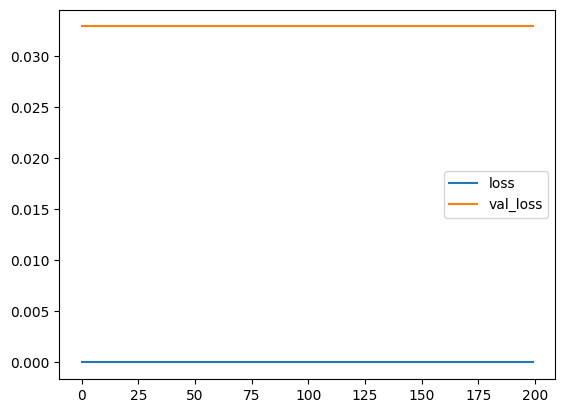

In [ ]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

In [ ]:
print(model.evaluate(X_test, y_test))


1/1 [==============================] - 0s 44ms/step - loss: 0.0152 - mse: 0.0152 - mae: 0.1073
[0.015178640373051167, 0.015178640373051167, 0.10733100026845932]


In [ ]:
y_predicted=model.predict(X_test)

print(y_predicted)

1/1 [==============================] - 0s 28ms/step
[[0.84037745]
 [1.0564474 ]
 [1.2126248 ]]


In [ ]:
y_test

2    0.976298
4    1.086352
8    1.032260
Name: sim_Ps, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_predicted,y_test)

0.01517864829986341